In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dados = pd.read_csv(r'C:\Users\Samsung\Desktop\PS4_GamesSales.csv', encoding='latin-1')

In [3]:
dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [4]:
dados.shape

(1034, 9)

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           1034 non-null   object 
 1   Year           825 non-null    float64
 2   Genre          1034 non-null   object 
 3   Publisher      825 non-null    object 
 4   North America  1034 non-null   float64
 5   Europe         1034 non-null   float64
 6   Japan          1034 non-null   float64
 7   Rest of World  1034 non-null   float64
 8   Global         1034 non-null   float64
dtypes: float64(6), object(3)
memory usage: 72.8+ KB


In [6]:
dados.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

In [7]:
#retirar os valores nulos
dados.dropna(inplace=True)

In [8]:
dados.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


Text(0.5, 0, 'Ano')

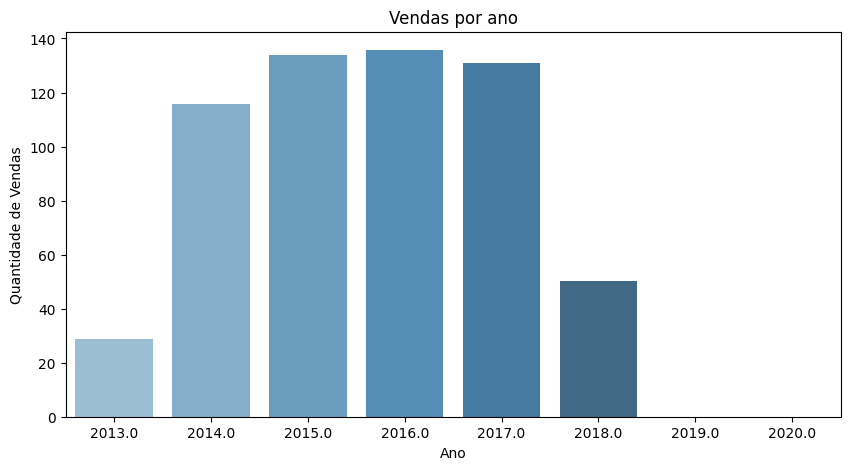

In [9]:
plt.figure(figsize=(10,5))
sns.barplot(data = dados, x = 'Year', y = 'Global', ci = None, palette = 'Blues_d', estimator=sum)
plt.title('Vendas por ano')
plt.ylabel('Quantidade de Vendas')
plt.xlabel('Ano')


In [10]:
#retirar os anos 2019 e 2020
dados = dados[dados['Year'] < 2019]

In [11]:
dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


Text(0.5, 0, 'Ano')

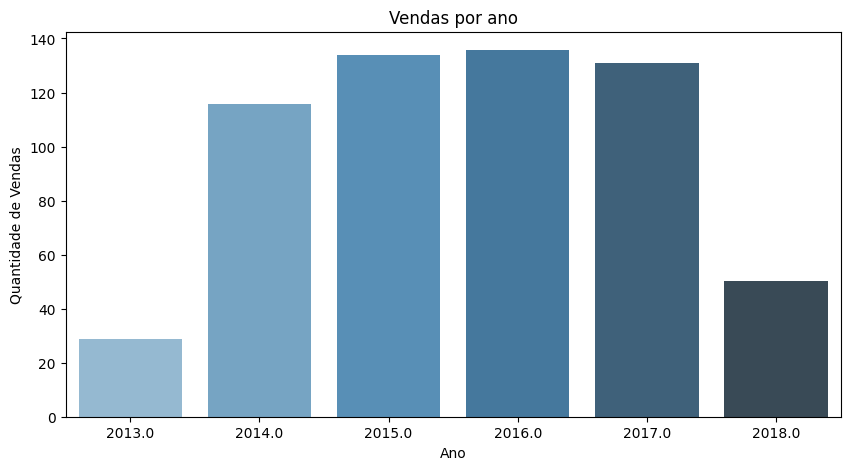

In [12]:
plt.figure(figsize=(10,5))
sns.barplot(data = dados, x = 'Year', y = 'Global', ci = None, palette = 'Blues_d', estimator=sum)
plt.title('Vendas por ano')
plt.ylabel('Quantidade de Vendas')
plt.xlabel('Ano')

In [13]:
#verificar os dados da coluna YEAR
dados['Year'].unique()

array([2014., 2015., 2018., 2017., 2016., 2013.])

Text(0.0, 1.0, 'Distribuição de Vendas Globais')

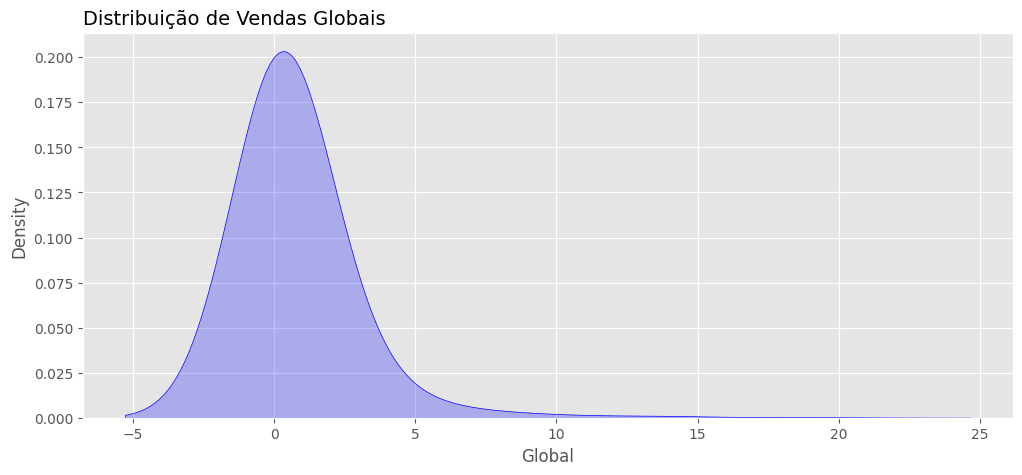

In [14]:
plt.figure(figsize = (12,5))
plt.style.use('ggplot')
sns.kdeplot(dados['Global'], shade = True, color = 'blue', bw = 1)
plt.title('Distribuição de Vendas Globais', loc='left', fontsize=14)

In [15]:
#fazer uma agrupamento da soma dos valores por ano e retirar Year do index

dados.groupby( by=['Year'] ).sum()


,North America,Europe,Japan,Rest of World,Global
Year,,,,,
2013.0,10.35,12.88,0.97,4.57,28.76
2014.0,39.80,54.12,3.58,18.29,115.85
2015.0,49.60,56.21,7.28,20.88,133.99
2016.0,47.40,57.98,9.65,20.71,135.72
2017.0,44.77,57.18,9.08,19.89,130.90
2018.0,19.65,18.70,4.13,7.69,50.20


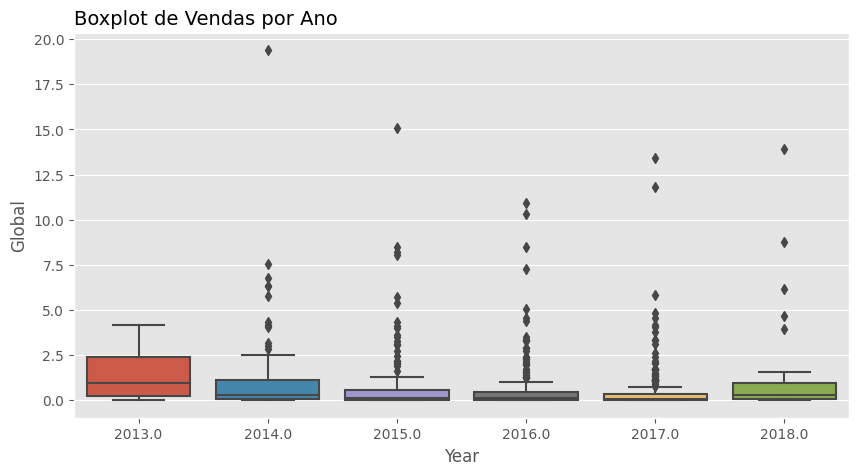

In [16]:
#boxplot
plt.figure(figsize = (10,5))
sns.boxplot(data = dados, x = 'Year', y = 'Global')
plt.title('Boxplot de Vendas por Ano', loc='left', fontsize=14);

In [17]:
dados10 = dados.loc[dados['Global']>=10]
dados10

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


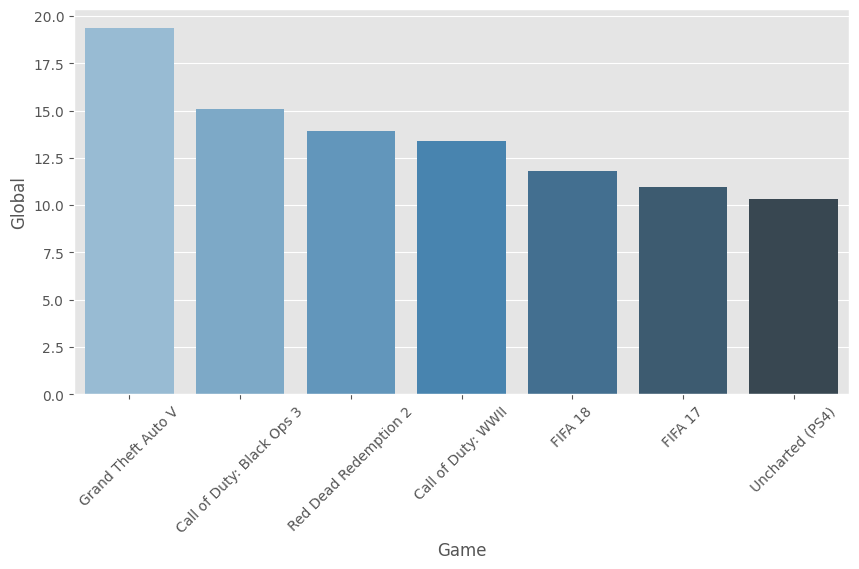

In [18]:
#plotar os jogos que tiveram SOMENTE mais de 10 milhões de vendas
plt.figure(figsize = (10,5))
sns.barplot(data = dados10, x = 'Game', y = 'Global', ci = None, palette = 'Blues_d', estimator=sum)

#rotar os nomes dos jogos
plt.xticks(rotation=45);


In [19]:
dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [25]:
Analise = dados.groupby( by=['Year'] ).sum().reset_index()

#analisando a proporção de cada 100% comparado ao total de vendas
America = [America / Total * 100 for America, Total in zip(Analise ['North America'], Analise ['Global'])]
Europe = [Europe / Total * 100 for Europe, Total in zip(Analise ['Europe'], Analise ['Global'])]
Japan = [Japan / Total * 100 for Japan, Total in zip(Analise ['Japan'], Analise ['Global'])]
Mundo = [Mundo / Total * 100 for Mundo, Total in zip(Analise ['Rest of World'], Analise ['Global'])]

In [26]:
Analise

,Year,North America,Europe,Japan,Rest of World,Global
0,2013.0,10.35,12.88,0.97,4.57,28.76
1,2014.0,39.80,54.12,3.58,18.29,115.85
2,2015.0,49.60,56.21,7.28,20.88,133.99
3,2016.0,47.40,57.98,9.65,20.71,135.72
4,2017.0,44.77,57.18,9.08,19.89,130.90
5,2018.0,19.65,18.70,4.13,7.69,50.20


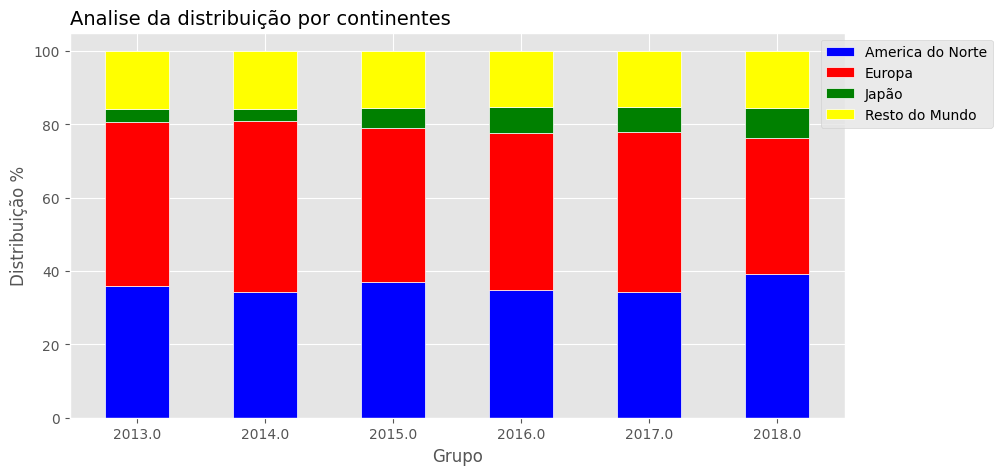

In [27]:
#analise da distribuição por continentes
plt.figure(figsize = (10,5))
#largura d abarra
barra_largura = 0.5
Rotulos = Analise['Year']
Grupos = [0,1,2,3,4,5]

#titulo
plt.title('Analise da distribuição por continentes', loc='left', fontsize=14)

#plot da america
plt.bar (Grupos, America,  width=barra_largura, label='America do Norte', color = 'blue'  ,edgecolor='white')

#plot da europa
plt.bar (Grupos, Europe, bottom = America, width=barra_largura, label='Europa', color = 'red'  ,edgecolor='white')

#plot do japao
plt.bar (Grupos, Japan, bottom = [i+j for i,j in zip(America, Europe)], width=barra_largura, label='Japão', color = 'green'  ,edgecolor='white')

#plot do resto do mundo
plt.bar (Grupos, Mundo, bottom = [i+j+k for i,j,k in zip(America, Europe, Japan)], width=barra_largura, label='Resto do Mundo', color = 'yellow'  ,edgecolor='white')

#labels
plt.xticks(Grupos, Rotulos)
plt.xlabel('Grupo')
plt.ylabel('Distribuição %')

#legenda
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), ncol=1);

In [28]:
dados['Publisher'].unique()

array(['Rockstar Games', 'Activision', 'EA Sports', 'Electronic Arts',
       'Sony Interactive Entertainment', 'Bethesda Softworks',
       'Sony Computer Entertainment', 'Namco Bandai Games', 'Square Enix',
       'Capcom', 'Blizzard Entertainment', 'Ubisoft',
       'Warner Bros. Interactive', '2K Sports',
       'Warner Bros. Interactive Entertainment',
       'Konami Digital Entertainment', '2K Games', 'Hello Games',
       '505 Games', 'Deep Silver', 'Take-Two Interactive',
       'Bandai Namco Games', 'Sega', 'Tecmo Koei', 'Gearbox Software',
       'Mojang', 'Disney Interactive Studios', 'Focus Home Interactive',
       'Studio Wildcard', 'Codemasters', 'Koch Media',
       'Harmonix Music Systems', 'Rebellion Developments', 'Gun Media',
       'Telltale Games', 'Kalypso Media', 'City Interactive',
       'NIS America', 'Sold Out', 'Tripwire Interactive', 'PQube',
       'THQ Nordic', 'Milestone S.r.l.', 'Nordic Games', 'Astragon',
       'Koei Tecmo', 'Frontier Developments', 

In [29]:
#transformar os valores da coluna Publisher em valores numericos
from sklearn.preprocessing import LabelEncoder
funcao_label = LabelEncoder()
dados['Produtor '] = funcao_label.fit_transform(dados['Publisher'])
dados['Genero'] = funcao_label.fit_transform(dados['Genre'])
dados['Jogo'] = funcao_label.fit_transform(dados['Game'])

In [30]:
dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222


In [31]:
#transformar a coluna Produtor para float64
dados['Produtor '] = dados['Produtor '].astype('float64')
dados['Genero'] = dados['Genero'].astype('float64')
dados['Jogo'] = dados['Jogo'].astype('float64')


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805 entries, 0 to 1030
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           805 non-null    object 
 1   Year           805 non-null    float64
 2   Genre          805 non-null    object 
 3   Publisher      805 non-null    object 
 4   North America  805 non-null    float64
 5   Europe         805 non-null    float64
 6   Japan          805 non-null    float64
 7   Rest of World  805 non-null    float64
 8   Global         805 non-null    float64
 9   Produtor       805 non-null    float64
 10  Genero         805 non-null    float64
 11  Jogo           805 non-null    float64
dtypes: float64(9), object(3)
memory usage: 81.8+ KB


In [ ]:
Paleta_Cores = sns.color_palette('husl', 8)
Paleta_Cores

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

In [ ]:
dados['Produtor ']

0       107.0
1         8.0
2       107.0
3         8.0
4        40.0
        ...  
1024    121.0
1026    121.0
1027     34.0
1028     17.0
1030    124.0
Name: Produtor , Length: 805, dtype: float64

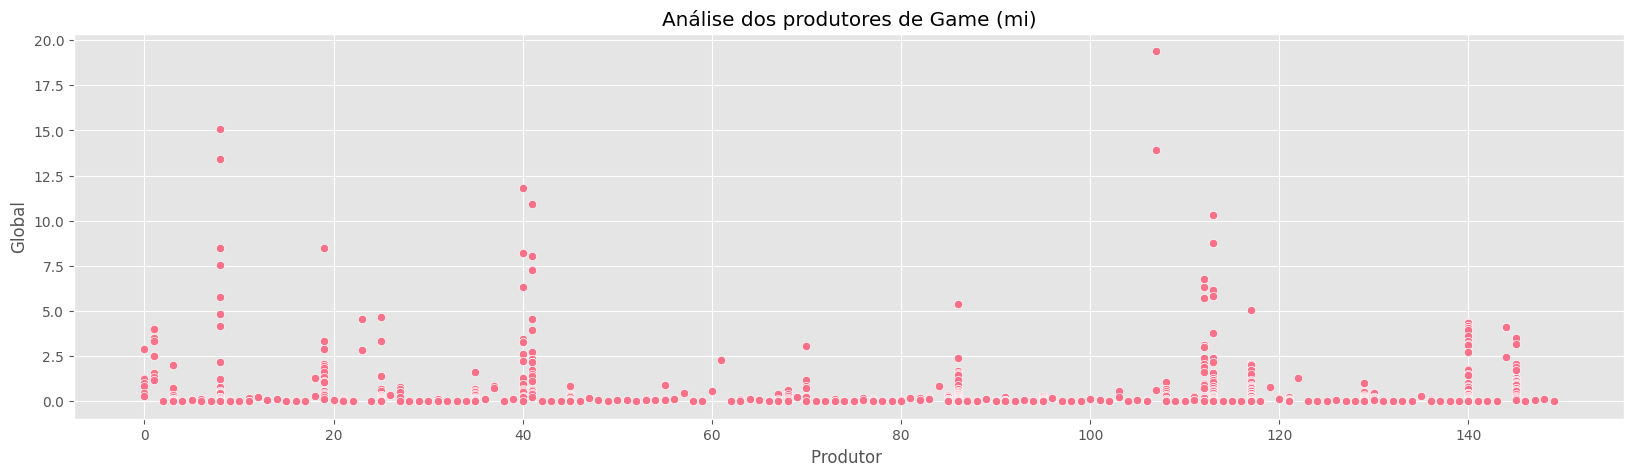

In [ ]:
plt.figure( figsize=(20,5))
plt.title('Análise dos produtores de Game (mi)')
sns.scatterplot(data=dados, x='Produtor ', y='Global', color=Paleta_Cores[0] );

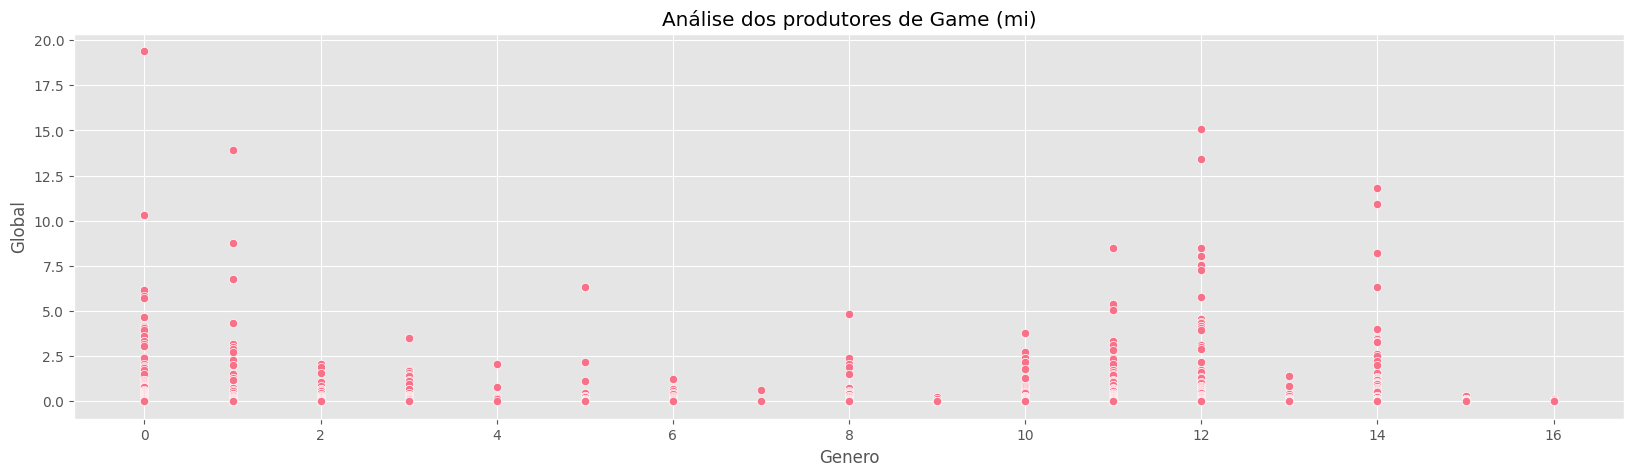

In [ ]:
plt.figure( figsize=(20,5))
plt.title('Análise dos produtores de Game (mi)')
sns.scatterplot(data=dados, x='Genero', y='Global', color=Paleta_Cores[0] );

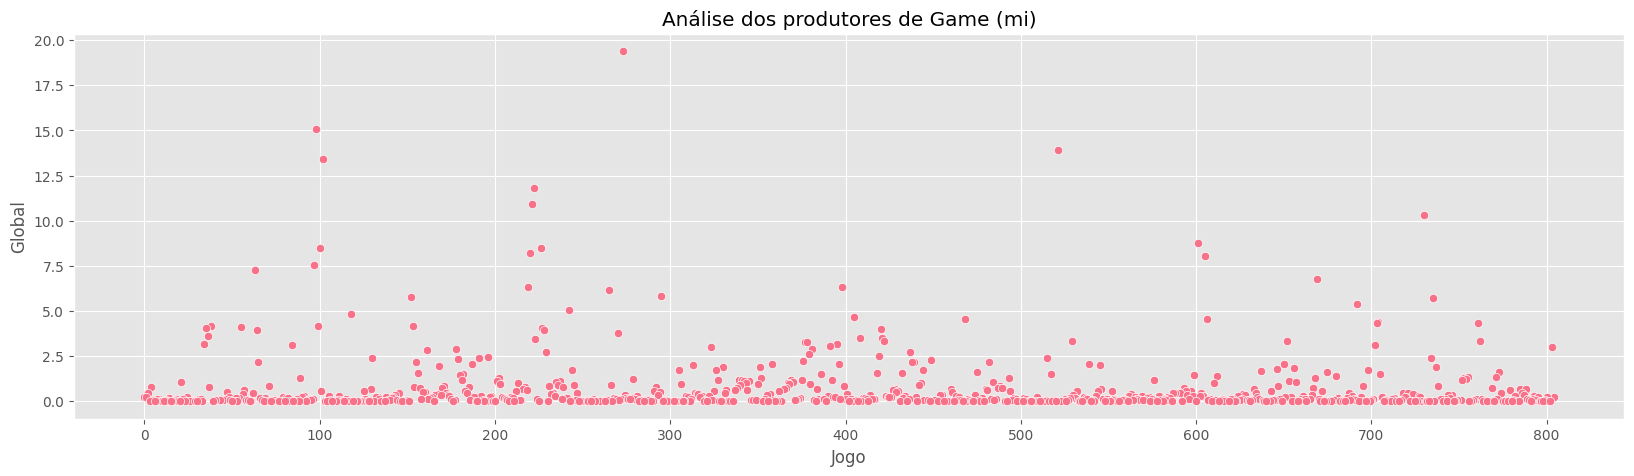

In [ ]:
plt.figure( figsize=(20,5))
plt.title('Análise dos produtores de Game (mi)')
sns.scatterplot(data=dados, x='Jogo', y='Global', color=Paleta_Cores[0] );